In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import sqlite3
import glob
import os
from pyentrp.entropy import *
from nolitsa.delay import dmi
from nolitsa.dimension import fnn
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,9)

In [19]:
# raw_datafiles = glob.glob('../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/**_V2.sqlite')
raw_datafiles = glob.glob('../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/**_V2.sqlite')
raw_datafiles.sort()
raw_datafiles.append('../simulations/illinois/expensive_nuclear/IL_XN_CC30_52.sqlite')
raw_datafiles

['../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2010_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2011_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2012_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2013_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2014_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2015_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2016_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2017_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2018_52_V2.sqlite',
 '../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_

In [20]:
def get_scenario_id(filepath):
    filename = filepath.split('/')[-1].strip('.sqlite')
    identifiers = filename.split('_')
    windyr = identifiers[-3]  
    solaryr = identifiers[-4]
    strID = windyr+'_'+solaryr 
    return(strID)

In [21]:
def get_average_capacity_factors(filepath):
    connector = sqlite3.connect(filepath)
    cursor=connector.cursor()
    command = """SELECT tech, AVG(cf_tech) FROM CapacityFactorTech 
                 WHERE tech IS 'WIND_FARM' OR tech IS 'SOLAR_FARM'
                 GROUP BY tech"""
    metadata = cursor.execute(command)
    data = cursor.fetchall()
    return data

In [22]:
get_average_capacity_factors(raw_datafiles[0])

[('SOLAR_FARM', 0.17751688699089674), ('WIND_FARM', 0.31853461837134234)]

In [23]:
def get_std_capacity_factors(filepath):
    connector = sqlite3.connect(filepath)
    cursor=connector.cursor()
    techs = ['SOLAR_FARM', 'WIND_FARM']
#     command = """SELECT tech, cf_tech FROM CapacityFactorTech 
#                  WHERE tech IS 'WIND_FARM' OR tech IS 'SOLAR_FARM'
#                  GROUP BY tech"""
    
    result = []
    
    for tech in techs:
        command = f"SELECT cf_tech FROM CapacityFactorTech \
                 WHERE tech IS '{tech}'"
        metadata = cursor.execute(command)
        data = cursor.fetchall()
        cf_data = [d[0] for d in data]
        std = np.array(cf_data).std()
        result.append((tech, std))
    return result

In [24]:
get_std_capacity_factors(raw_datafiles[0])

[('SOLAR_FARM', 0.24507168146765668), ('WIND_FARM', 0.20826231323317249)]

In [26]:
all_data={}
all_data['WIND_FARM_AVG'] = []
all_data['SOLAR_FARM_AVG'] = []
all_data['WIND_FARM_VAR'] = []
all_data['SOLAR_FARM_VAR'] = []
for i,f in enumerate(raw_datafiles):
    print(f"{i+1}/{len(raw_datafiles)}",f)
    scenario_data = get_average_capacity_factors(f)
    var_data = get_std_capacity_factors(f)
    for d in scenario_data:
        all_data[d[0]+'_AVG'].append(d[1])
    for d in var_data:
        all_data[d[0]+'_VAR'].append(d[1])
        
cf_df = pd.DataFrame(all_data)

1/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2010_52_V2.sqlite
2/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2011_52_V2.sqlite
3/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2012_52_V2.sqlite
4/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2013_52_V2.sqlite
5/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2014_52_V2.sqlite
6/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2015_52_V2.sqlite
7/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2016_52_V2.sqlite
8/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2017_52_V2.sqlite
9/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2018_52_V2.sqlite
10/122 ../simulations/illinois/expensive_nuclear_RE_sen

99/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2018_W2020_52_V2.sqlite
100/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2010_52_V2.sqlite
101/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2011_52_V2.sqlite
102/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2012_52_V2.sqlite
103/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2013_52_V2.sqlite
104/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2014_52_V2.sqlite
105/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2015_52_V2.sqlite
106/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2016_52_V2.sqlite
107/122 ../simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2019_W2017_52_V2.sqlite
108/122 ../simulations/illinois/expens

In [27]:
cf_df

,WIND_FARM_AVG,SOLAR_FARM_AVG,WIND_FARM_VAR,SOLAR_FARM_VAR
0,0.318535,0.177517,0.208262,0.245072
1,0.358176,0.177517,0.217843,0.245072
2,0.350307,0.177517,0.220009,0.245072
3,0.354733,0.177517,0.233014,0.245072
4,0.357163,0.177517,0.222740,0.245072
...,...,...,...,...
117,0.367531,0.164922,0.228539,0.228436
118,0.339977,0.164922,0.217665,0.228436
119,0.346948,0.164922,0.202671,0.228436
120,0.330718,0.164922,0.223591,0.228436


In [28]:
obj_df = pd.read_csv('../data/results/objective_value_XN_V2.csv', usecols=['Objective_Value'])
obj_df

,Objective_Value
0,156221.644879
1,152978.632488
2,157709.649171
3,154773.396960
4,159020.901028
...,...
117,161912.096378
118,161385.122481
119,156198.017837
120,160746.359625


In [29]:
new_df = pd.concat([cf_df, obj_df], axis=1)
new_df

,WIND_FARM_AVG,SOLAR_FARM_AVG,WIND_FARM_VAR,SOLAR_FARM_VAR,Objective_Value
0,0.318535,0.177517,0.208262,0.245072,156221.644879
1,0.358176,0.177517,0.217843,0.245072,152978.632488
2,0.350307,0.177517,0.220009,0.245072,157709.649171
3,0.354733,0.177517,0.233014,0.245072,154773.396960
4,0.357163,0.177517,0.222740,0.245072,159020.901028
...,...,...,...,...,...
117,0.367531,0.164922,0.228539,0.228436,161912.096378
118,0.339977,0.164922,0.217665,0.228436,161385.122481
119,0.346948,0.164922,0.202671,0.228436,156198.017837
120,0.330718,0.164922,0.223591,0.228436,160746.359625


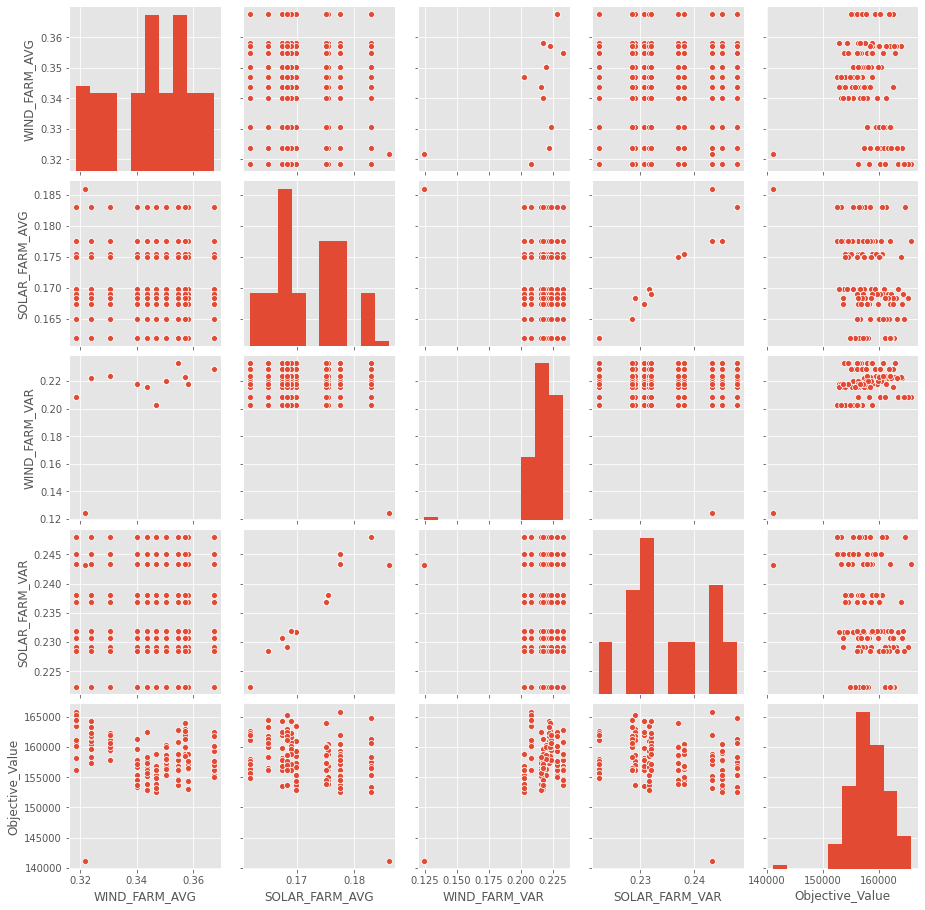

In [30]:
sb.pairplot(new_df)

<AxesSubplot:xlabel='SOLAR_FARM_AVG', ylabel='WIND_FARM_AVG'>

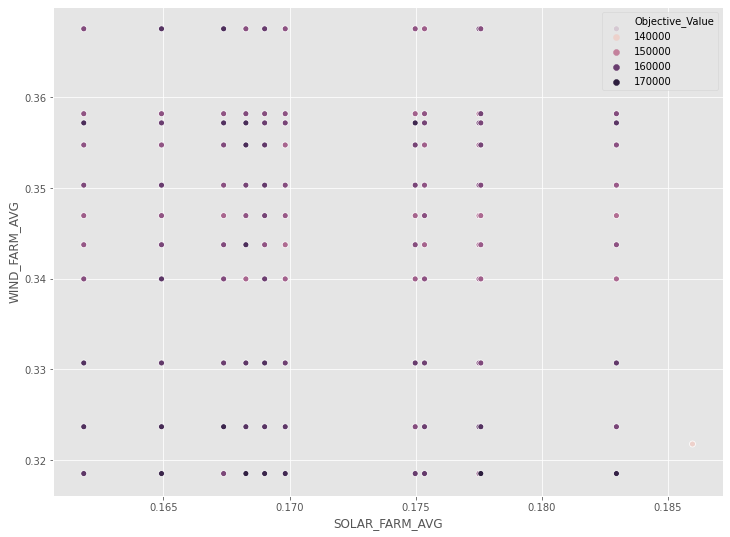

In [31]:
sb.scatterplot(data=new_df, x='SOLAR_FARM_AVG', y='WIND_FARM_AVG', hue='Objective_Value')

In [32]:
new_df['AVG_RE_CF'] = (new_df['SOLAR_FARM_AVG'] + new_df['WIND_FARM_AVG'])/2
# new_df['AVG_RE_CF'] = (new_df['SOLAR_FARM_AVG'] + new_df['WIND_FARM_AVG'])/2

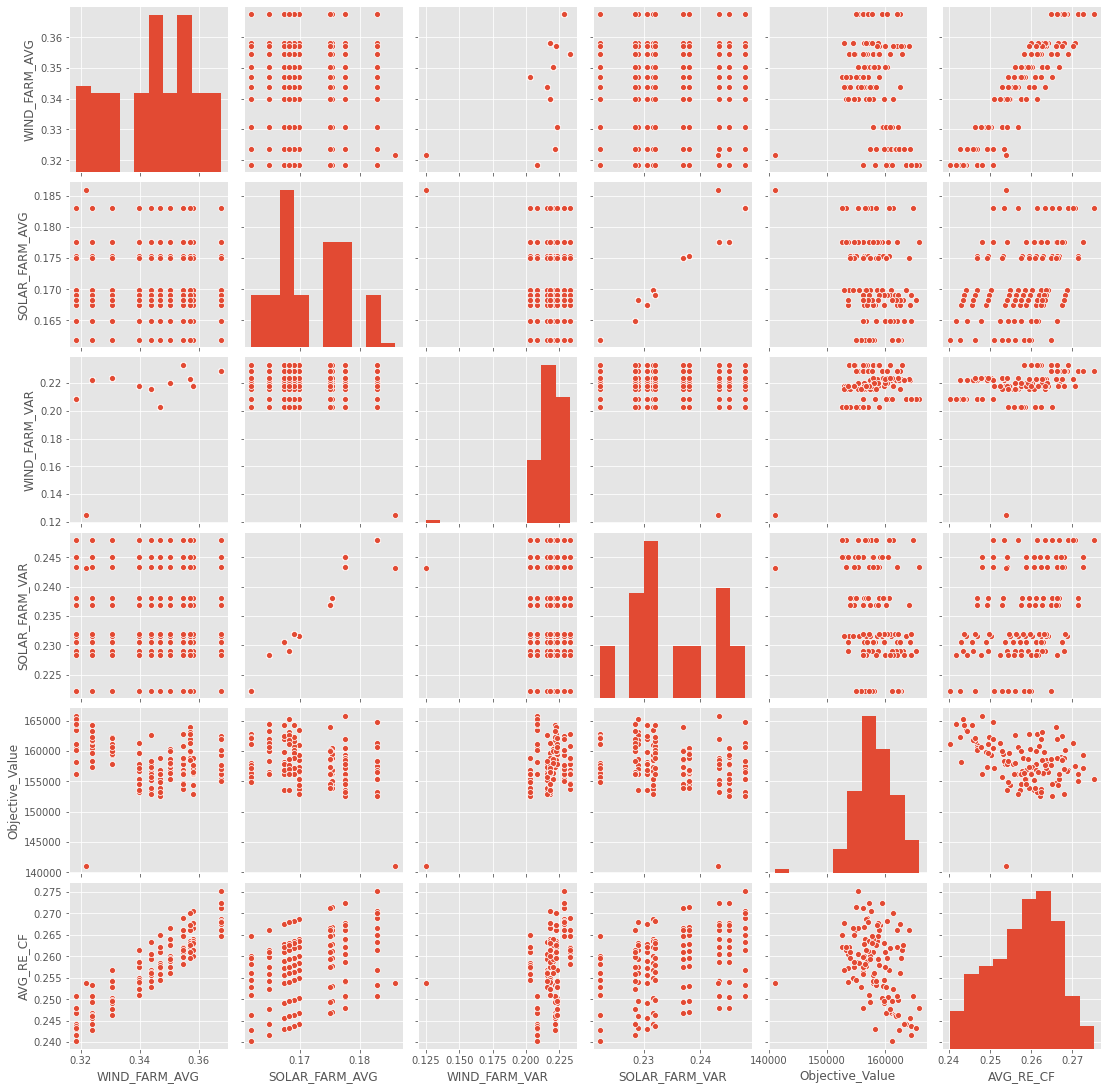

In [33]:
sb.pairplot(new_df)

In [34]:
corrs = new_df.corr()
corrs

,WIND_FARM_AVG,SOLAR_FARM_AVG,WIND_FARM_VAR,SOLAR_FARM_VAR,Objective_Value,AVG_RE_CF
WIND_FARM_AVG,1.000000,-0.029197,0.373563,-0.013691,-0.279619,0.920186
SOLAR_FARM_AVG,-0.029197,1.000000,-0.150453,0.973576,-0.310756,0.364447
WIND_FARM_VAR,0.373563,-0.150453,1.000000,-0.070548,0.400311,0.289094
SOLAR_FARM_VAR,-0.013691,0.973576,-0.070548,1.000000,-0.262737,0.368544
Objective_Value,-0.279619,-0.310756,0.400311,-0.262737,1.000000,-0.382205
AVG_RE_CF,0.920186,0.364447,0.289094,0.368544,-0.382205,1.000000


In [35]:
min_obj = min(new_df['Objective_Value'])

In [36]:
outlier_free = new_df[new_df['Objective_Value']>min_obj]
outlier_free

,WIND_FARM_AVG,SOLAR_FARM_AVG,WIND_FARM_VAR,SOLAR_FARM_VAR,Objective_Value,AVG_RE_CF
0,0.318535,0.177517,0.208262,0.245072,156221.644879,0.248026
1,0.358176,0.177517,0.217843,0.245072,152978.632488,0.267847
2,0.350307,0.177517,0.220009,0.245072,157709.649171,0.263912
3,0.354733,0.177517,0.233014,0.245072,154773.396960,0.266125
4,0.357163,0.177517,0.222740,0.245072,159020.901028,0.267340
...,...,...,...,...,...,...
116,0.323693,0.164922,0.222091,0.228436,163279.185236,0.244308
117,0.367531,0.164922,0.228539,0.228436,161912.096378,0.266227
118,0.339977,0.164922,0.217665,0.228436,161385.122481,0.252449
119,0.346948,0.164922,0.202671,0.228436,156198.017837,0.255935


In [37]:
corrs2 = outlier_free.corr()
corrs2

,WIND_FARM_AVG,SOLAR_FARM_AVG,WIND_FARM_VAR,SOLAR_FARM_VAR,Objective_Value,AVG_RE_CF
WIND_FARM_AVG,1.000000e+00,-1.280254e-15,3.982466e-01,-9.428559e-16,-0.386611,0.923500
SOLAR_FARM_AVG,-1.280254e-15,1.000000e+00,-8.587330e-16,9.792458e-01,-0.249157,0.383599
WIND_FARM_VAR,3.982466e-01,-8.587330e-16,1.000000e+00,-4.541290e-16,0.124106,0.367781
SOLAR_FARM_VAR,-9.428559e-16,9.792458e-01,-4.541290e-16,1.000000e+00,-0.246250,0.375637
Objective_Value,-3.866108e-01,-2.491567e-01,1.241062e-01,-2.462501e-01,1.000000,-0.452611
AVG_RE_CF,9.234999e-01,3.835988e-01,3.677807e-01,3.756375e-01,-0.452611,1.000000


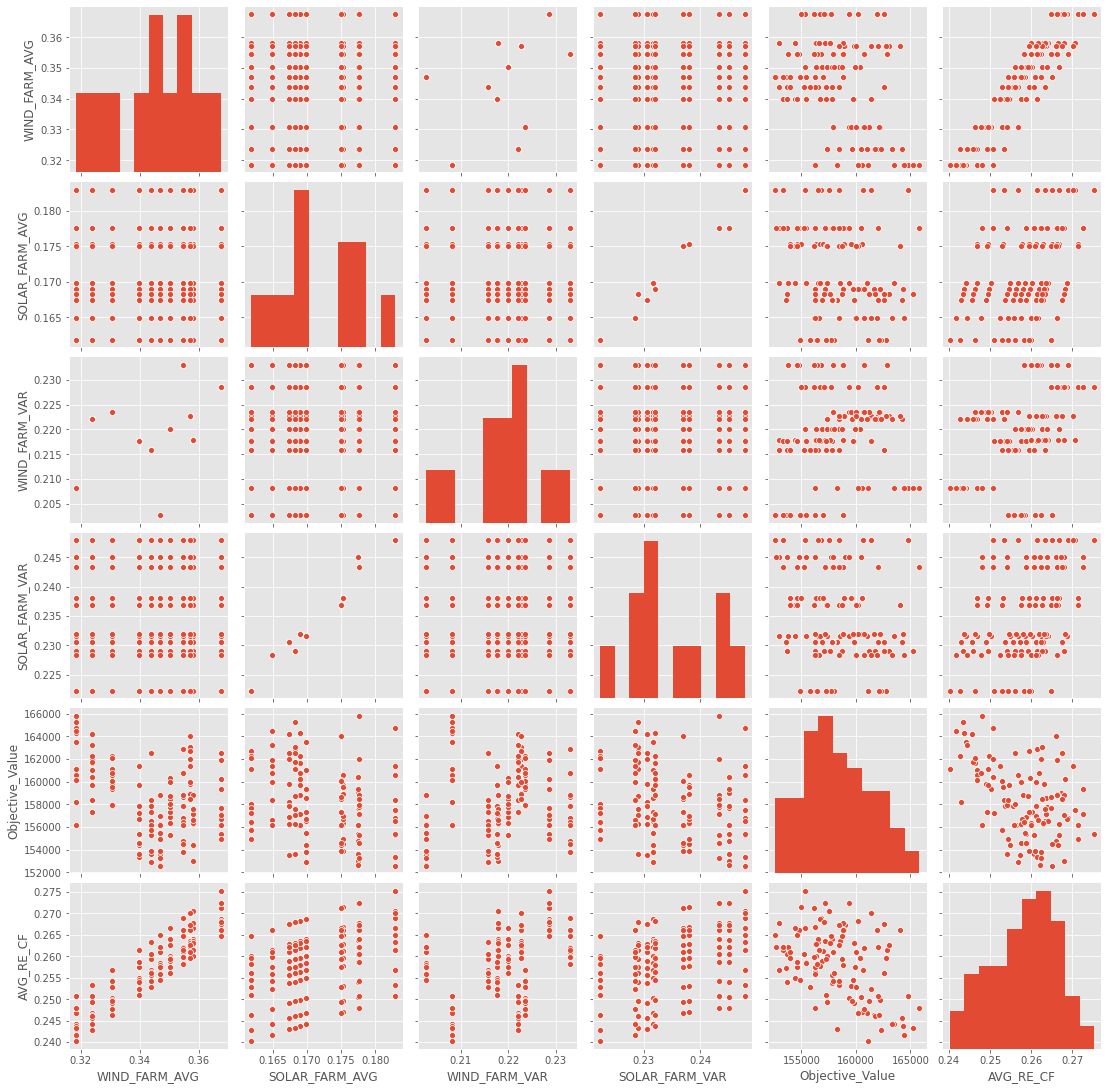

In [38]:
sb.pairplot(outlier_free)

# Weighted Permutation Entropy?

### Step 1: Calculate the time delay using mutual information

In [41]:
def get_capacity_factors(filepath):
    connector = sqlite3.connect(filepath)
    cursor=connector.cursor()
    techs = ['SOLAR_FARM', 'WIND_FARM']
#     command = """SELECT tech, cf_tech FROM CapacityFactorTech 
#                  WHERE tech IS 'WIND_FARM' OR tech IS 'SOLAR_FARM'
#                  GROUP BY tech"""
    
    result = {}
    
    for tech in techs:
        command = f"SELECT cf_tech FROM CapacityFactorTech \
                 WHERE tech IS '{tech}'"
        metadata = cursor.execute(command)
        data = cursor.fetchall()
        cf_data = [d[0] for d in data]
        result[tech] = cf_data
    return result

In [109]:
sf_cf = get_capacity_factors(raw_datafiles[0])['SOLAR_FARM']

In [110]:
from nolitsa.delay import dmi
tau_max = 100
T = np.arange(1,tau_max+1,1)
DMI = dmi(sf_cf, maxtau=tau_max)

In [111]:
is_minima = np.r_[True, DMI[1:] < DMI[:-1]] & np.r_[DMI[:-1] < DMI[1:], True]
minima_indices = np.where(is_minima == True)[0]
dmi_minima = np.array([DMI[i] for i in minima_indices])

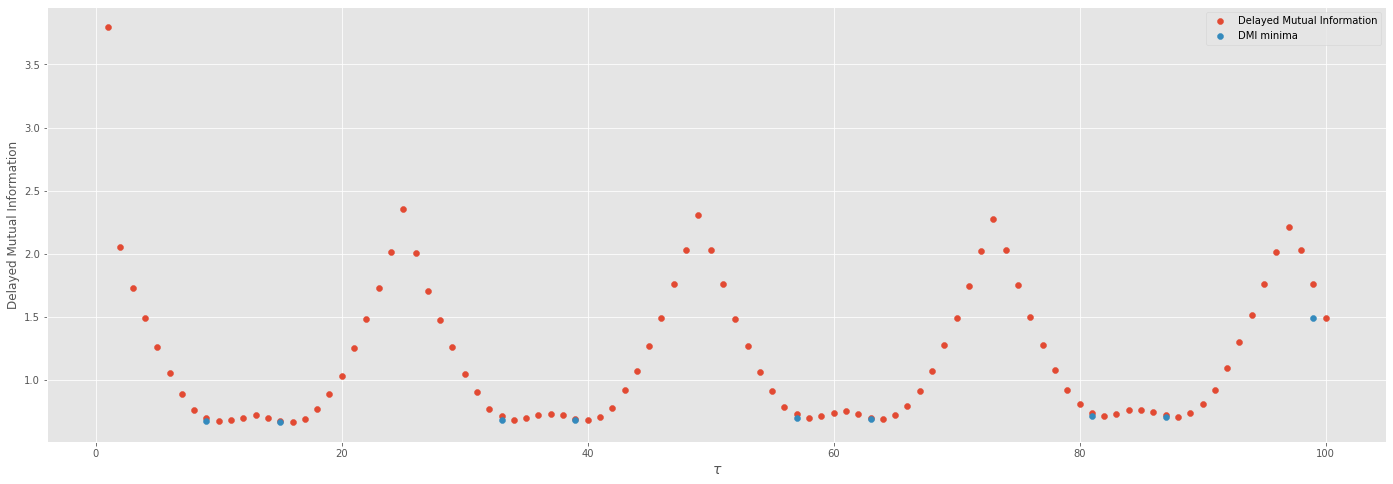

In [112]:
plt.figure(figsize=(24, 8))
plt.scatter(T, DMI, label='Delayed Mutual Information')
plt.scatter(minima_indices, dmi_minima, label='DMI minima')
plt.xlabel(r"$\tau$", fontsize=14)
plt.ylabel("Delayed Mutual Information")
plt.legend()
# plt.rcParams['text.usetex'] = True
# plt.xticks(T[:20])
plt.show()

In [113]:
tau = minima_indices[1]

### Step 2: Calculate the embedding dimension using false nearest neighbors

In [114]:
from nolitsa.dimension import fnn
dimensions = list(np.arange(3,10,1))
a,b,c = fnn(sf_cf, dim=dimensions, tau=tau, maxnum=1000, parallel=True)

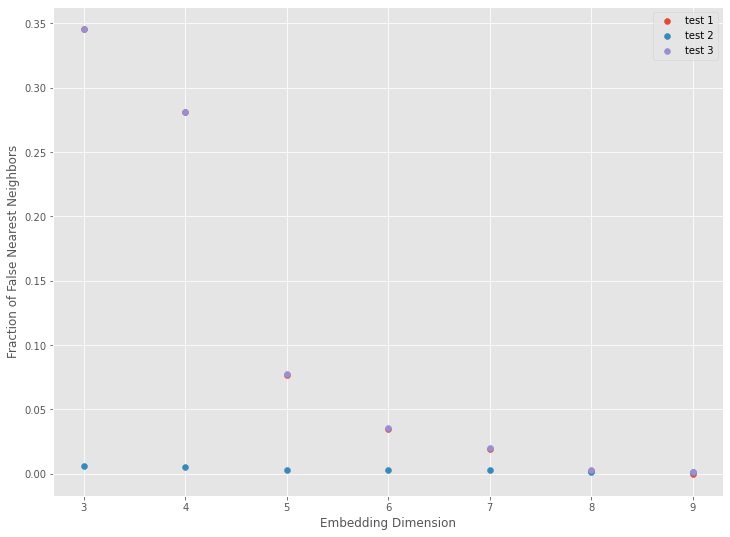

In [115]:
plt.scatter(dimensions, a, label='test 1')
plt.scatter(dimensions, b, label='test 2')
plt.scatter(dimensions, c, label='test 3')
plt.xlabel("Embedding Dimension")
plt.ylabel("Fraction of False Nearest Neighbors")
plt.legend()

In [116]:
threshold = 0.2
idx = np.where(c<=threshold)[0][0]
D = dimensions[idx]
D

5

### Step 3: Embed the data and calculate the WPE

In [117]:
from pyentrp.entropy import _embed, weighted_permutation_entropy

In [118]:
embed = _embed(sf_cf, order=D, delay=tau)

In [119]:
embed.shape

(1188, 5)

In [120]:
weighted_permutation_entropy(sf_cf, order=D, delay=tau, normalize=True)

0.5875184601347355

In [124]:
def calculate_wpe(fname):
    """
    Calculates the WPE for solar and wind from a given dataset
    """
    result = {}
    cfs = get_capacity_factors(fname)
    for k in cfs.keys():
        cf = cfs[k]
        # calculate time delay
        tau_max = 100
        T = np.arange(1,tau_max+1,1)
        DMI = dmi(cf, maxtau=tau_max)
        tau = minima_indices[1]
        # calculate embedding dimension
        dimensions = list(np.arange(3,10,1))
        a,b,c = fnn(cf, dim=dimensions, tau=tau, maxnum=1000, parallel=True)
        threshold = 0.2
        idx = np.where(c<=threshold)[0][0]
        D = dimensions[idx]
        # calculate wpe
        wpe = weighted_permutation_entropy(cf, order=D, delay=tau, normalize=True)
#         print(k, wpe)
        result[k] = wpe
    return result

In [125]:
calculate_wpe(raw_datafiles[0])

{'SOLAR_FARM': 0.5875184601347355, 'WIND_FARM': 0.9926755466776654}

In [127]:
solar_wpe = np.zeros(len(raw_datafiles))
wind_wpe = np.zeros(len(raw_datafiles))
for i, f in enumerate(raw_datafiles):
    print(f'{i}/{len(raw_datafiles)}')
    ent = calculate_wpe(f)
    solar_wpe[i] = ent['SOLAR_FARM']
    wind_wpe[i] = ent['WIND_FARM']

0/122
1/122
2/122
3/122
4/122
5/122
6/122
7/122
8/122
9/122
10/122
11/122
12/122
13/122
14/122
15/122
16/122
17/122
18/122
19/122
20/122
21/122
22/122
23/122
24/122
25/122
26/122
27/122
28/122
29/122
30/122
31/122
32/122
33/122
34/122
35/122
36/122
37/122
38/122
39/122
40/122
41/122
42/122
43/122
44/122
45/122
46/122
47/122
48/122
49/122
50/122
51/122
52/122
53/122
54/122
55/122
56/122
57/122
58/122
59/122
60/122
61/122
62/122
63/122
64/122
65/122
66/122
67/122
68/122
69/122
70/122
71/122
72/122
73/122
74/122
75/122
76/122
77/122
78/122
79/122
80/122
81/122
82/122
83/122
84/122
85/122
86/122
87/122
88/122
89/122
90/122
91/122
92/122
93/122
94/122
95/122
96/122
97/122
98/122
99/122
100/122
101/122
102/122
103/122
104/122
105/122
106/122
107/122
108/122
109/122
110/122
111/122
112/122
113/122
114/122
115/122
116/122
117/122
118/122
119/122
120/122
121/122


In [128]:
new_df['SOLAR_WPE'] = solar_wpe
new_df['WIND_WPE'] = wind_wpe

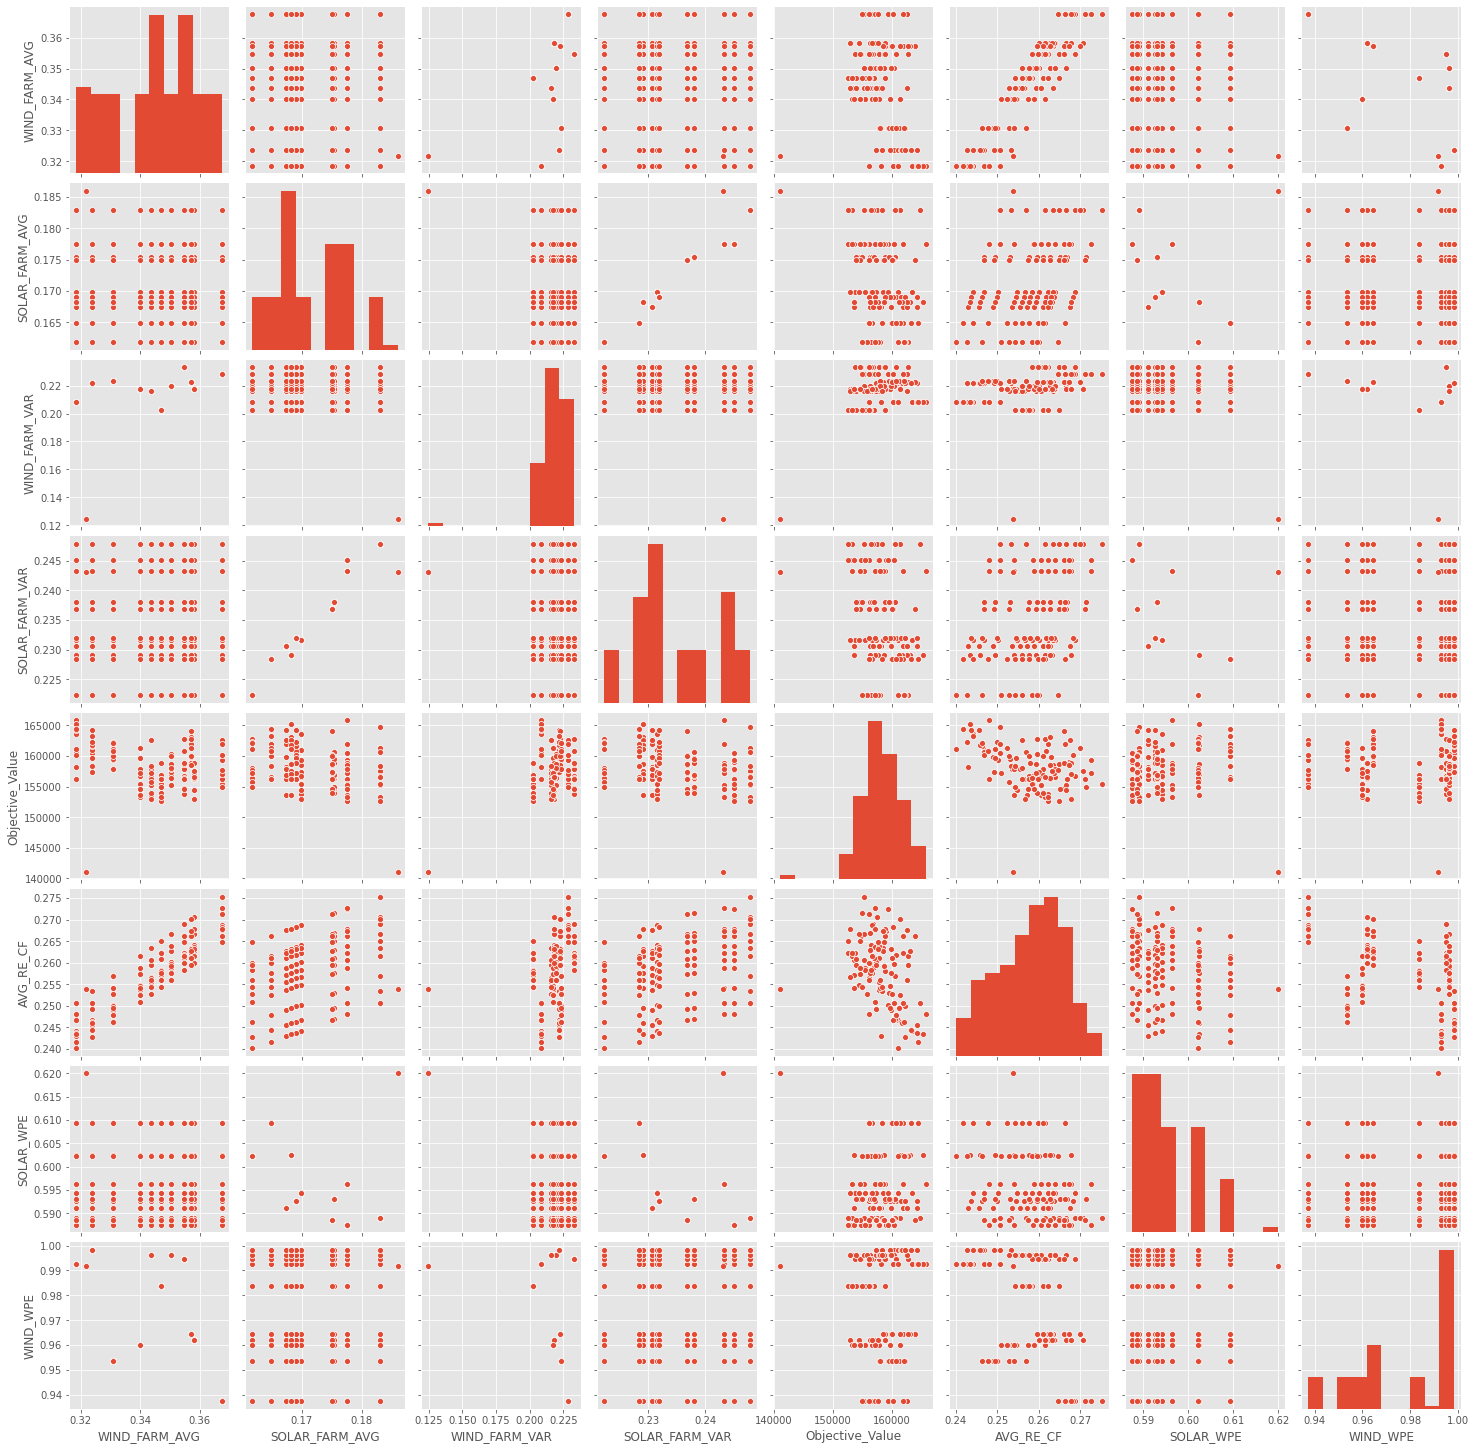

In [131]:
sb.pairplot(new_df)

In [132]:
min_obj = min(new_df['Objective_Value'])

In [133]:
outlier_free = new_df[new_df['Objective_Value']>min_obj]
outlier_free

,WIND_FARM_AVG,SOLAR_FARM_AVG,WIND_FARM_VAR,SOLAR_FARM_VAR,Objective_Value,AVG_RE_CF,SOLAR_WPE,WIND_WPE
0,0.318535,0.177517,0.208262,0.245072,156221.644879,0.248026,0.587518,0.992676
1,0.358176,0.177517,0.217843,0.245072,152978.632488,0.267847,0.587518,0.961965
2,0.350307,0.177517,0.220009,0.245072,157709.649171,0.263912,0.587518,0.996325
3,0.354733,0.177517,0.233014,0.245072,154773.396960,0.266125,0.587518,0.994755
4,0.357163,0.177517,0.222740,0.245072,159020.901028,0.267340,0.587518,0.964597
...,...,...,...,...,...,...,...,...
116,0.323693,0.164922,0.222091,0.228436,163279.185236,0.244308,0.609283,0.998250
117,0.367531,0.164922,0.228539,0.228436,161912.096378,0.266227,0.609283,0.937415
118,0.339977,0.164922,0.217665,0.228436,161385.122481,0.252449,0.609283,0.960005
119,0.346948,0.164922,0.202671,0.228436,156198.017837,0.255935,0.609283,0.983619


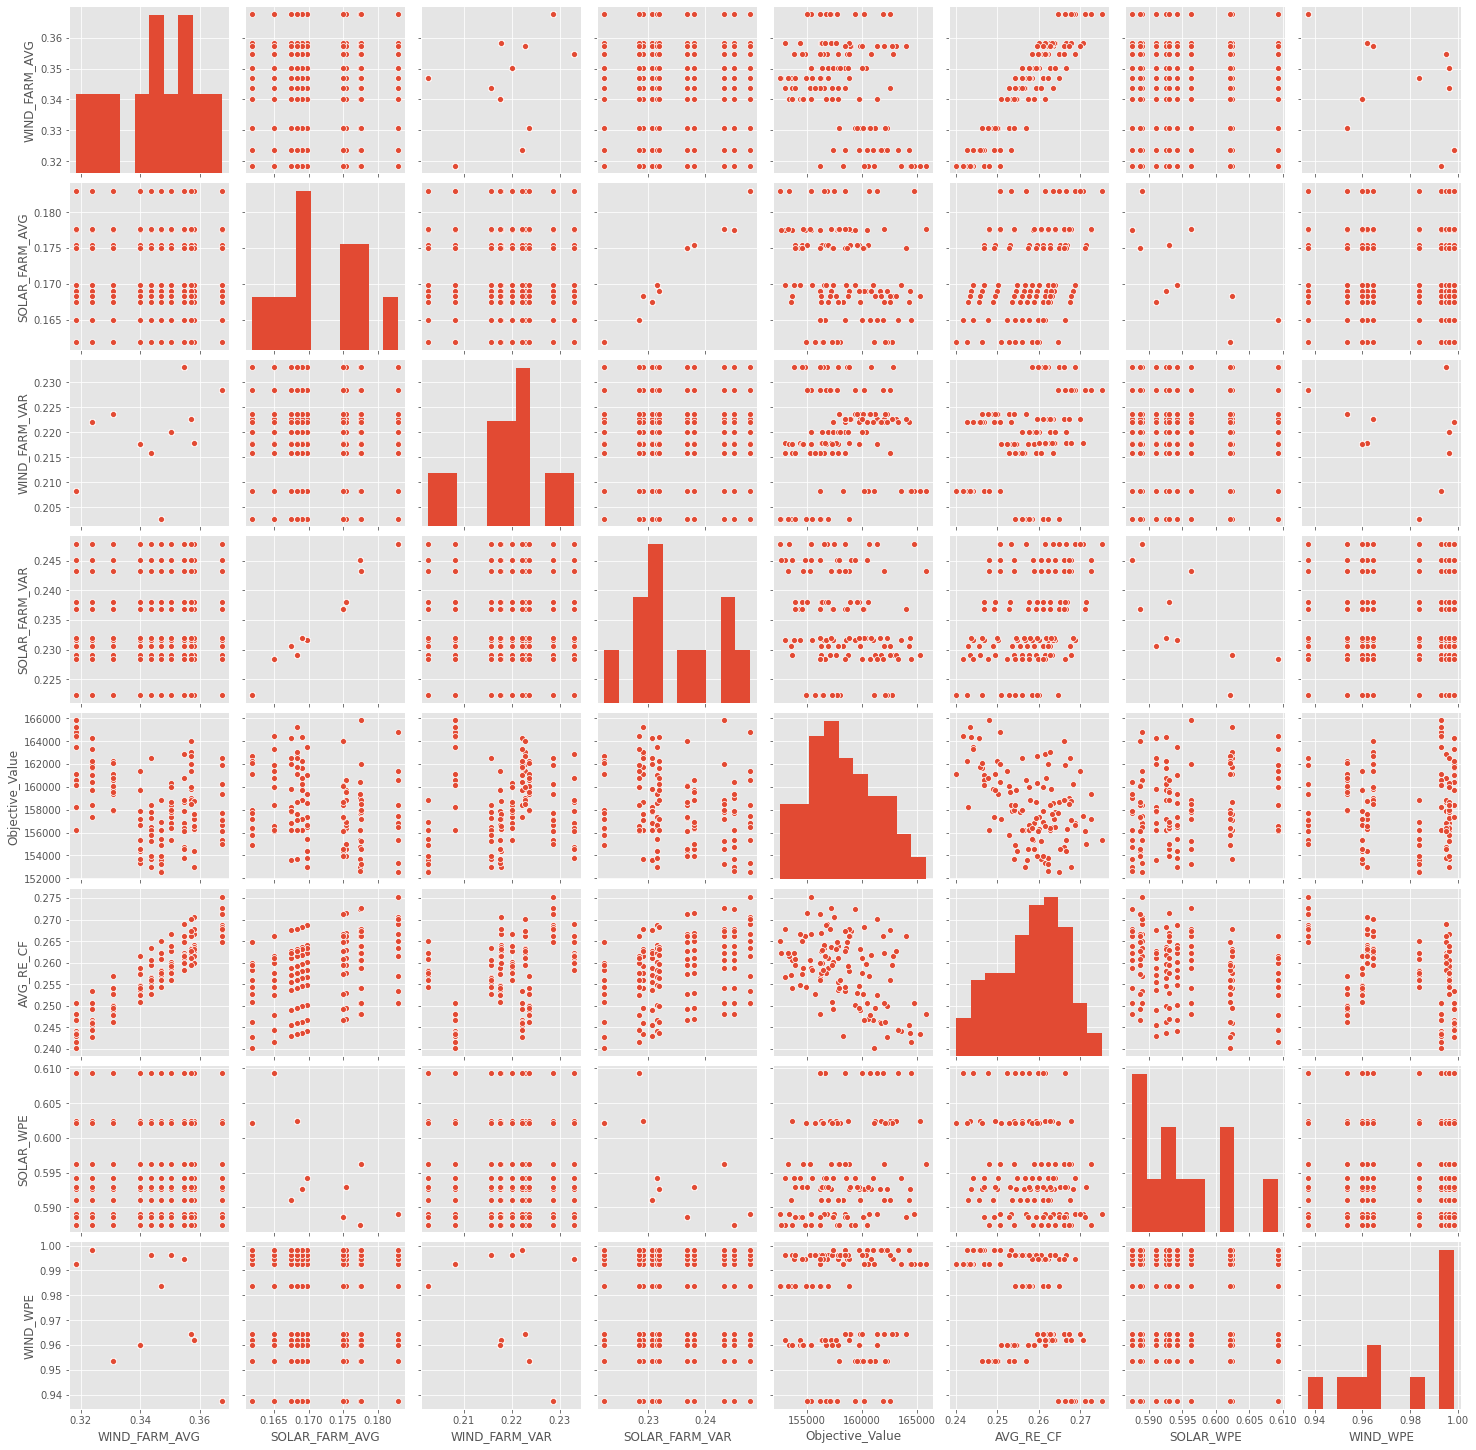

In [134]:
sb.pairplot(outlier_free)

# Multivariate Linear Model?